In [2]:
import numpy as np
import matplotlib.pylab as plt 
import imageio.v3 as iio
import networkx as nx
from itertools import count


In [3]:

im = iio.imread('mapa_v1.png')
mapa=np.array(im)

(10, 10)


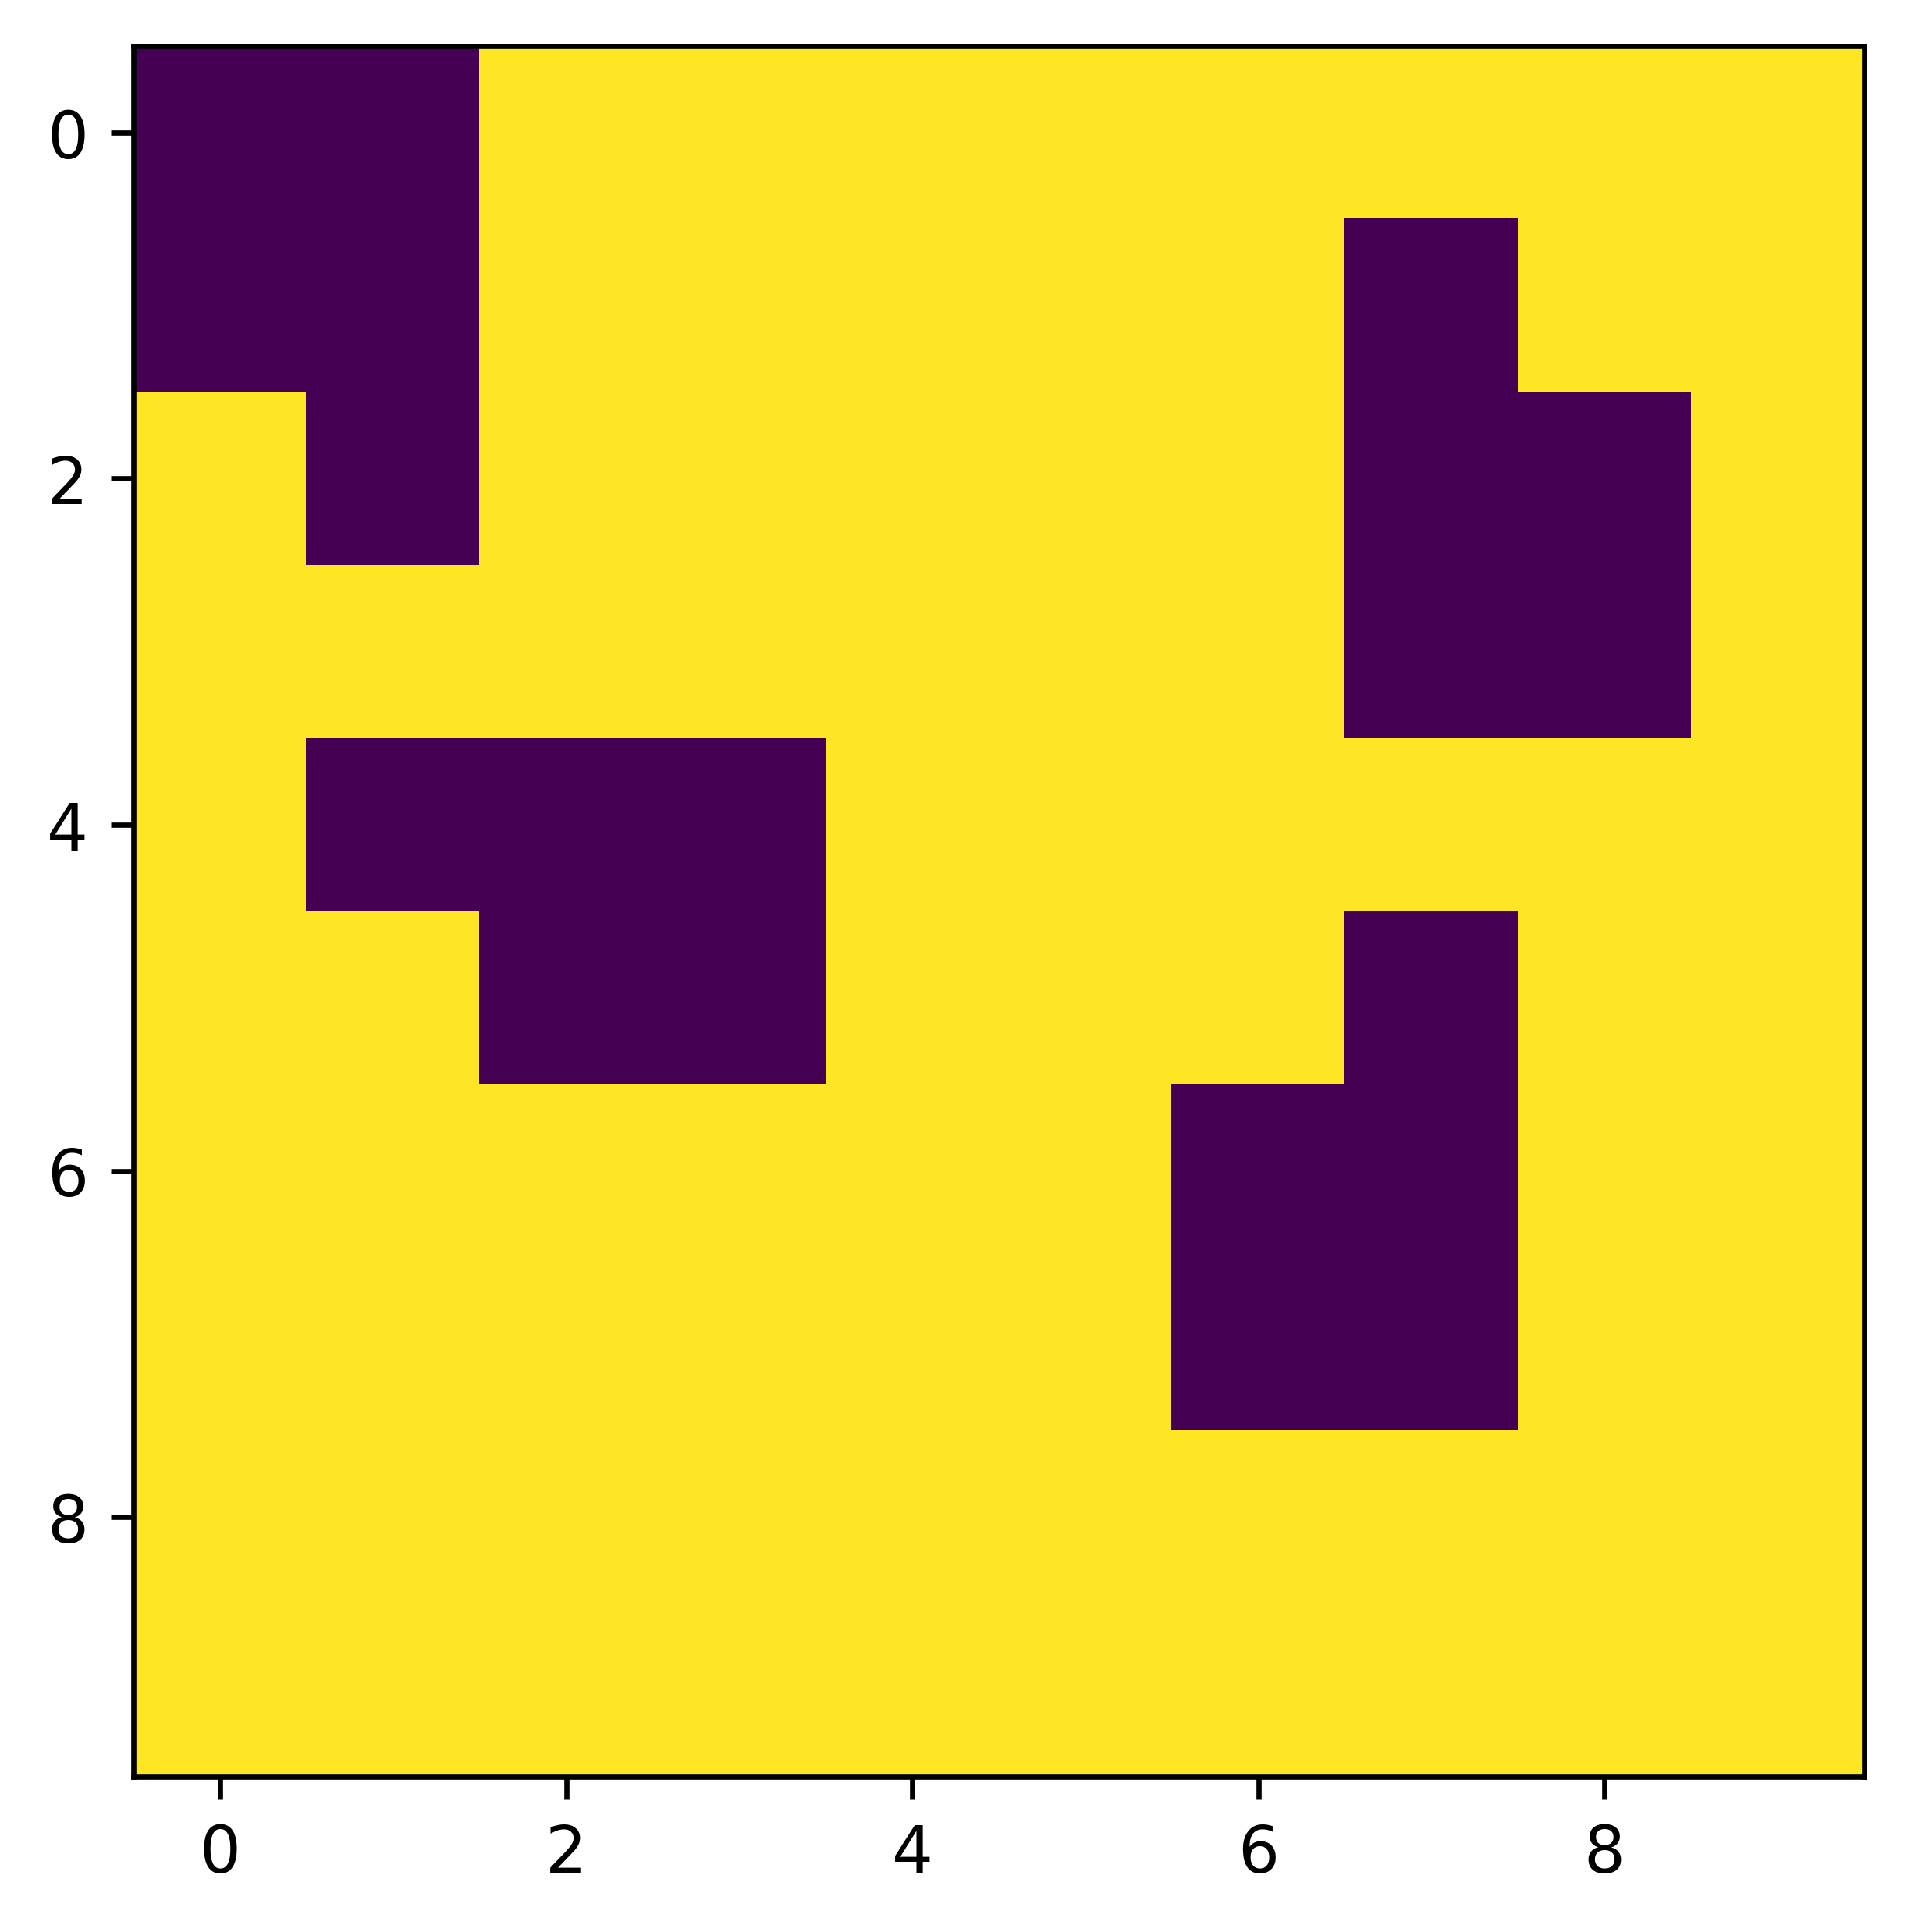

In [4]:
mapa_b=mapa>250
mapa_c=mapa_b[:, :, 0]*1
print(mapa_c.shape)
plt.figure(dpi=600)
plt.imshow(mapa_c)

(10, 10)


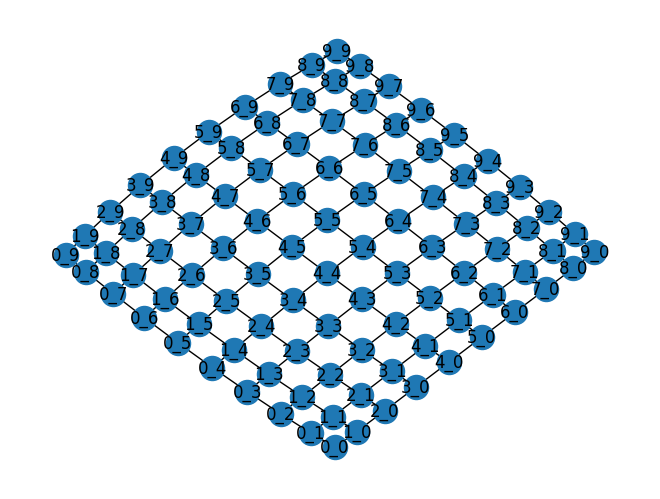

In [5]:
G=nx.Graph()
nx.set_node_attributes(G, 0, "Aceso")
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):
        #print(i,j)
        k=str(i)+'_'+str(j)
        G.add_node(k)
        G.nodes[k]["Aceso"]=mapa_c[i,j]

print(mapa_c.shape)
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):

            k=str(i)+'_'+str(j)
            kd=str(i+1)+'_'+str(j)
            kb=str(i)+'_'+str(j+1)
            
            if i+1==mapa_c.shape[0]:
                if j+1<mapa_c.shape[1]:
                    G.add_edge(k,kb)
                    # print(k,'->',kb)
            elif j+1==mapa_c.shape[1]:
                
                G.add_edge(k,kd)
                # print(k,'->',kd)

            else :
                # print("---")
                G.add_edge(k,kd)
                G.add_edge(k,kb)
                # print(k,'->',kb)
                # print(k,'->',kd)

pos= nx.spring_layout(G,iterations=200)
nx.draw(G,with_labels=True,pos=pos)
        
        


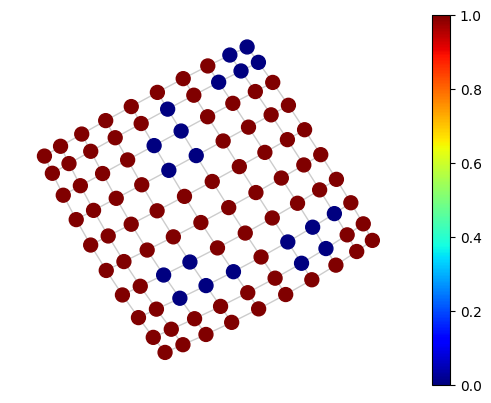

In [8]:

# get unique groups
groups = set(nx.get_node_attributes(G,"Aceso").values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]["Aceso"]] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(G,iterations=200)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

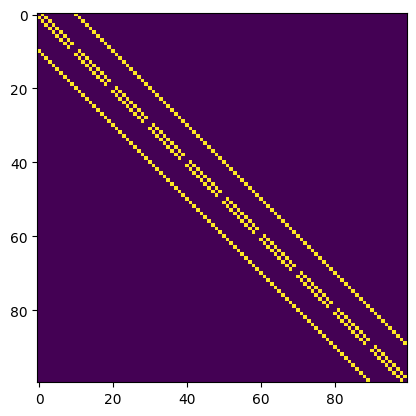

In [6]:
A = nx.to_numpy_array(G)
plt.imshow(A)